/tmp/ipykernel_29258/2401539934.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Heatmap saved to /home/hp/nayanika/github/GPX6/figures/salt_bridge_heatmap_mousecys.png


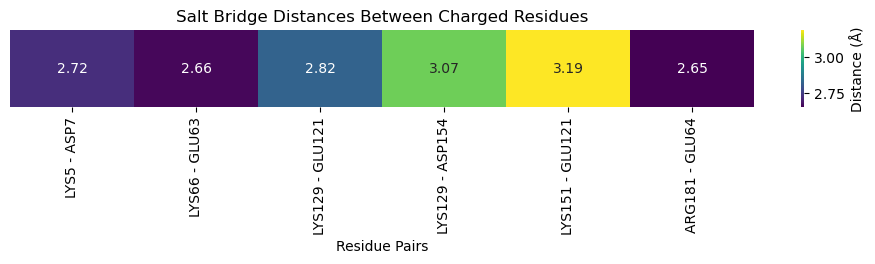

In [7]:
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def find_salt_bridges(pdb_file, cutoff=4.0):
    """
    Identify ion pairs and salt bridges between oppositely charged residues.
    
    Parameters:
    pdb_file (str): Path to the PDB file.
    cutoff (float): Distance cutoff for identifying salt bridges in Angstroms.
    
    Returns:
    list: List of dictionaries containing pairs of residues in salt bridges.
    """
    # Initialize PDB parser
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    
    # Define charged residues and their charged atoms
    positively_charged = {'LYS': 'NZ', 'ARG': 'NH1', 'HIS': 'ND1'}
    negatively_charged = {'ASP': 'OD1', 'GLU': 'OE1'}
    
    # List to store identified salt bridges
    salt_bridges = []
    
    # Loop over all chains and residues to find salt bridges
    for chain in structure[0]:
        for pos_res in chain:
            if pos_res.resname in positively_charged:
                pos_atom = pos_res[positively_charged[pos_res.resname]]
                
                for neg_res in chain:
                    if neg_res == pos_res or neg_res.resname not in negatively_charged:
                        continue
                    neg_atom = neg_res[negatively_charged[neg_res.resname]]
                    
                    # Calculate distance between charged atoms
                    distance = pos_atom - neg_atom
                    if distance <= cutoff:
                        salt_bridges.append({
                            'pos_res': f"{pos_res.resname}{pos_res.id[1]}",
                            'neg_res': f"{neg_res.resname}{neg_res.id[1]}",
                            'chain': chain.id,
                            'distance': round(distance, 2)
                        })
    
    return salt_bridges

def plot_salt_bridges_heatmap(salt_bridges, save_path=None):
    """
    Plot and optionally save a heatmap showing distances between residues in salt bridges.
    
    Parameters:
    salt_bridges (list): List of salt bridges with position and distance information.
    save_path (str, optional): Path to save the heatmap image. Defaults to None.
    """
    if not salt_bridges:
        print("No salt bridges found to plot")
        return
    
    # Prepare data for heatmap
    residue_pairs = [f"{bridge['pos_res']} - {bridge['neg_res']}" for bridge in salt_bridges]
    distances = [bridge['distance'] for bridge in salt_bridges]
    
    # Create a DataFrame for the heatmap
    data = pd.DataFrame({'Residue_Pairs': residue_pairs, 'Distance': distances})
    data.set_index('Residue_Pairs', inplace=True)
    
    # Since we have a single column, pivot for display as a 2D array
    heatmap_data = pd.DataFrame(data['Distance']).T  # Transpose for single row
    
    # Plot heatmap
    plt.figure(figsize=(12, 1))  # Adjust height for single row
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Distance (Å)'})
    plt.title("Salt Bridge Distances Between Charged Residues")
    plt.xlabel("Residue Pairs")
    plt.yticks([], [])  # Hide y-axis as we have only one row
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Save plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Heatmap saved to {save_path}")
    
    plt.show()

# Specify the PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Find salt bridges
salt_bridges = find_salt_bridges(pdb_file)

# Specify the save path for the heatmap image
save_path = "/home/hp/nayanika/github/GPX6/figures/salt_bridge_heatmap_mousecys.png"

# Plot and save the heatmap
plot_salt_bridges_heatmap(salt_bridges, save_path=save_path)


Heatmap saved to /home/hp/nayanika/github/GPX6/figures/salt_bridges_heatmap.png


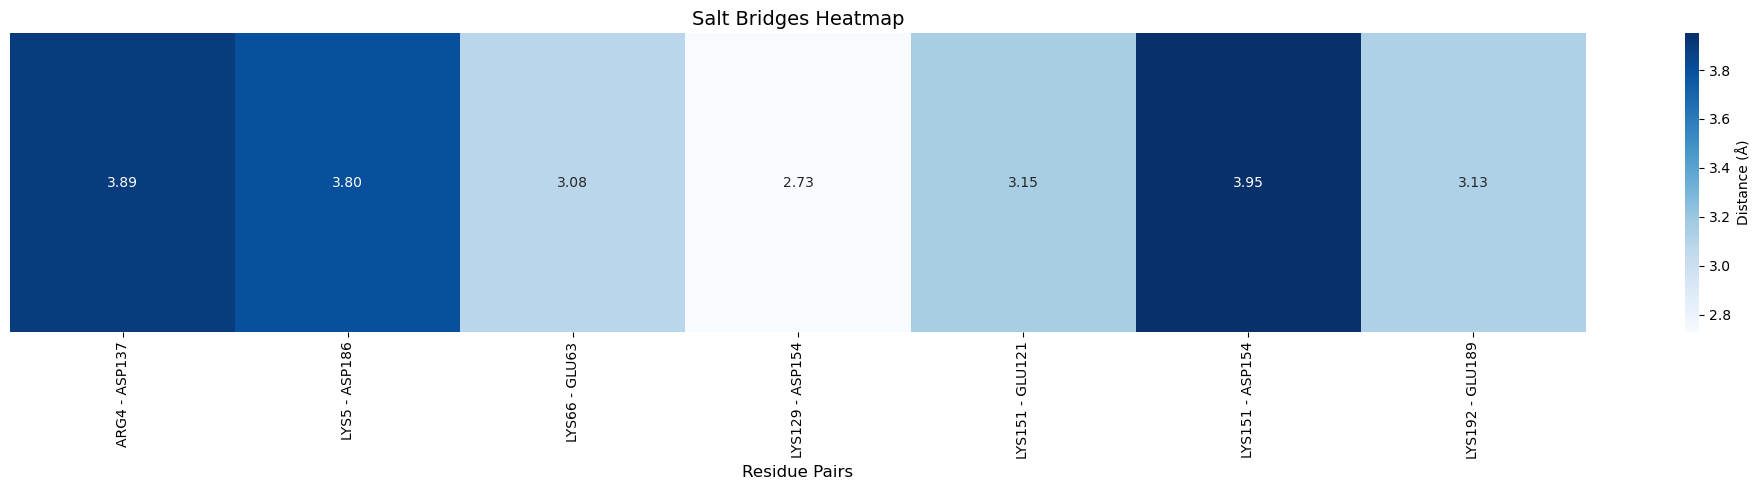

No interactions found for Disulfide Bonds Heatmap
Heatmap saved to /home/hp/nayanika/github/GPX6/figures/hydrophobic_heatmap.png


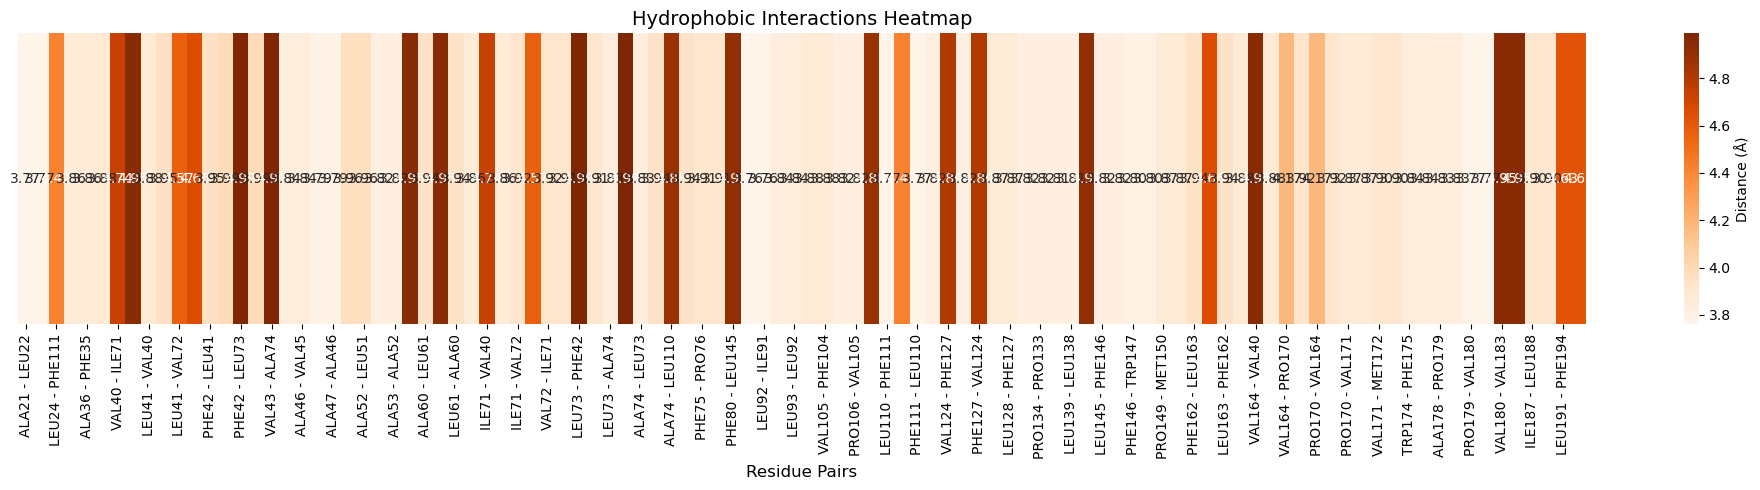

Heatmap saved to /home/hp/nayanika/github/GPX6/figures/hydrophilic_heatmap.png


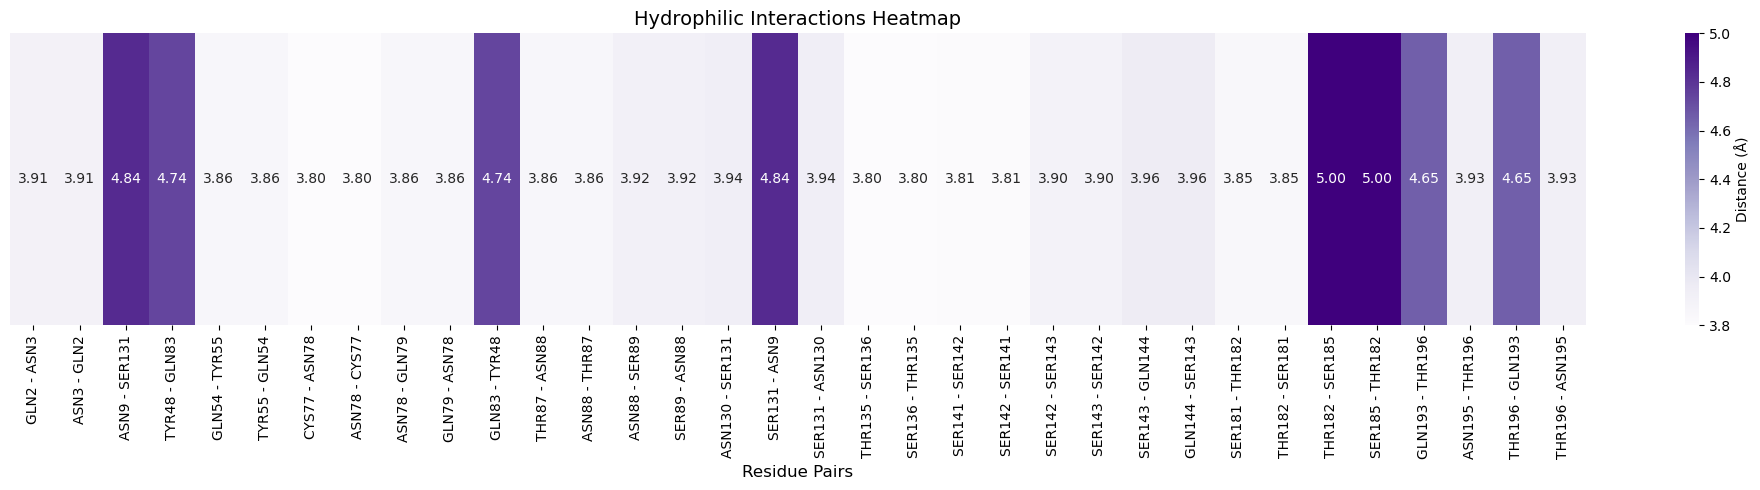

In [6]:
from Bio.PDB import PDBParser
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def find_salt_bridges(pdb_file, cutoff=4.0):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)

    positively_charged = {'LYS': 'NZ', 'ARG': 'NH1', 'HIS': 'ND1'}
    negatively_charged = {'ASP': 'OD1', 'GLU': 'OE1'}
    salt_bridges = []

    for chain in structure[0]:
        for pos_res in chain:
            if pos_res.resname in positively_charged:
                pos_atom = pos_res[positively_charged[pos_res.resname]]
                for neg_res in chain:
                    if neg_res == pos_res or neg_res.resname not in negatively_charged:
                        continue
                    neg_atom = neg_res[negatively_charged[neg_res.resname]]
                    distance = pos_atom - neg_atom
                    if distance <= cutoff:
                        salt_bridges.append({
                            'res1': f"{pos_res.resname}{pos_res.id[1]}",
                            'res2': f"{neg_res.resname}{neg_res.id[1]}",
                            'distance': round(distance, 2)
                        })
    return salt_bridges


def find_disulfide_bonds(pdb_file, cutoff=2.2):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    disulfide_bonds = []

    for chain in structure[0]:
        for res1 in chain:
            if res1.resname == 'CYS':
                for res2 in chain:
                    if res1 == res2 or res2.resname != 'CYS':
                        continue
                    if 'SG' in res1 and 'SG' in res2:
                        distance = res1['SG'] - res2['SG']
                        if distance <= cutoff:
                            disulfide_bonds.append({
                                'res1': f"{res1.resname}{res1.id[1]}",
                                'res2': f"{res2.resname}{res2.id[1]}",
                                'distance': round(distance, 2)
                            })
    return disulfide_bonds


def find_hydrophobic_hydrophilic_interactions(pdb_file, hydrophobic_cutoff=5.0, hydrophilic_cutoff=5.0):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)

    hydrophobic_residues = {'ALA', 'VAL', 'LEU', 'ILE', 'MET', 'PHE', 'TRP', 'PRO'}
    hydrophilic_residues = {'SER', 'THR', 'ASN', 'GLN', 'TYR', 'CYS'}
    hydrophobic_interactions = []
    hydrophilic_interactions = []

    for chain in structure[0]:
        for res1 in chain:
            for res2 in chain:
                if res1 == res2:
                    continue
                distance = res1['CA'] - res2['CA']
                if res1.resname in hydrophobic_residues and res2.resname in hydrophobic_residues:
                    if distance <= hydrophobic_cutoff:
                        hydrophobic_interactions.append({
                            'res1': f"{res1.resname}{res1.id[1]}",
                            'res2': f"{res2.resname}{res2.id[1]}",
                            'distance': round(distance, 2)
                        })
                elif res1.resname in hydrophilic_residues and res2.resname in hydrophilic_residues:
                    if distance <= hydrophilic_cutoff:
                        hydrophilic_interactions.append({
                            'res1': f"{res1.resname}{res1.id[1]}",
                            'res2': f"{res2.resname}{res2.id[1]}",
                            'distance': round(distance, 2)
                        })
    return hydrophobic_interactions, hydrophilic_interactions


def generate_interaction_heatmap(interactions, title, cmap, save_path=None):
    if not interactions:
        print(f"No interactions found for {title}")
        return
    
    data = pd.DataFrame(interactions)
    data['Interaction'] = data['res1'] + " - " + data['res2']
    data.set_index('Interaction', inplace=True)
    heatmap_data = pd.DataFrame(data['distance']).T

    # Increase figure size for better visualization
    plt.figure(figsize=(20, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'Distance (Å)'})
    plt.title(title, fontsize=14)
    plt.xlabel("Residue Pairs", fontsize=12)
    plt.yticks([], [])
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Heatmap saved to {save_path}")
    plt.show()


# Main execution
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_humansec.pdb"

# Find all interactions
salt_bridges = find_salt_bridges(pdb_file)
disulfide_bonds = find_disulfide_bonds(pdb_file)
hydrophobic_interactions, hydrophilic_interactions = find_hydrophobic_hydrophilic_interactions(pdb_file)

# Generate heatmaps
generate_interaction_heatmap(salt_bridges, title="Salt Bridges Heatmap", cmap="Blues",
                             save_path="/home/hp/nayanika/github/GPX6/figures/salt_bridges_heatmap.png")

generate_interaction_heatmap(disulfide_bonds, title="Disulfide Bonds Heatmap", cmap="Greens",
                             save_path="/home/hp/nayanika/github/GPX6/figures/disulfide_bonds_heatmap.png")

generate_interaction_heatmap(hydrophobic_interactions, title="Hydrophobic Interactions Heatmap", cmap="Oranges",
                             save_path="/home/hp/nayanika/github/GPX6/figures/hydrophobic_heatmap.png")

generate_interaction_heatmap(hydrophilic_interactions, title="Hydrophilic Interactions Heatmap", cmap="Purples",
                             save_path="/home/hp/nayanika/github/GPX6/figures/hydrophilic_heatmap.png")
